<center>
<b>EC4.403: Robotics: Planning and Navigation</b> <br>
<b>Spring 2021</b> <br>
<b>Assignment-2 </b>
</center>

<div style="text-align: right"><b>Team:</b> Makkhi-2 (2018102023, 2018111003)</div>

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

In [5]:
def letThereBeWorld(world_size):
    world = np.full((world_size[0],world_size[1],3), 255)
    world = world.astype(np.uint8)
    cv2.circle(world,robot_initial_point,5,(255,0,0),5) # Mark start point on the image
    cv2.circle(world,robot_goal_point,5,(0,255,0),5) # Mark goal point on the image
    return world

def getPath(r_i, r_g, v_min, v_max, delta_t, n):
    x_dot = cp.Variable(n)
    x = cp.Variable(n+1)
    y_dot = cp.Variable(n)
    y = cp.Variable(n+1)

    curb = []
    curb.append(y[0] == r_i[1])
    curb.append(x[0] == r_i[0])

    for i in range(n):
        dot_vals = []
        dot_vals.append(y_dot[i] <= v_max)
        dot_vals.append(x_dot[i] <= v_max)
        curb.extend(dot_vals)
        
        pos_vals = []
        pos_vals.append(y[i+1] == y[i] + y_dot[i]*delta_t)
        pos_vals.append(x[i+1] == x[i] + x_dot[i]*delta_t)
        curb.extend(pos_vals)
        
        vel_vals = []
        vel_vals.append(v_min <= y_dot[i])
        vel_vals.append(v_min <= x_dot[i])
        curb.extend(vel_vals)
    
    #cost equation is formulated, the 'problem' is formulated and solved using cvxypy.solve()
    cost_eq = (x[n] - r_g[0])**2 + (y[n] - r_g[1])**2
    cp.Problem(cp.Minimize(cost_eq), curb).solve()

    x = np.round(x.value)
    y = np.round(y.value)
    
    x = x.astype(np.int)
    y = y.astype(np.int)
    
    return x,y


def markPath(x,y,world):
#     Draw the path
    for i in range(len(x)-1):
        cv2.line(world, (x[i], y[i]), (x[i+1], y[i+1]), (0, 0, 255), 5) # Draw the path
#         cv2.imwrite("./results/q2/world_"+str(i+1)+".jpg",world) # save the image
        plt.imshow(world)
        plt.title("path after " + str(i+1) + " steps")
        plt.show()

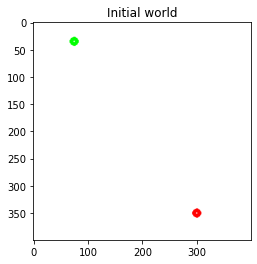

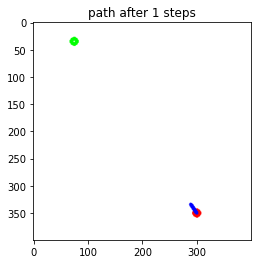

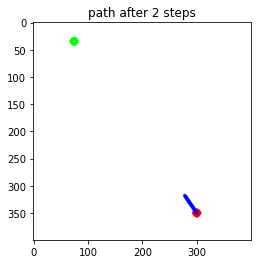

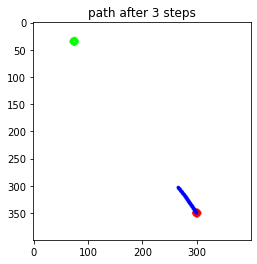

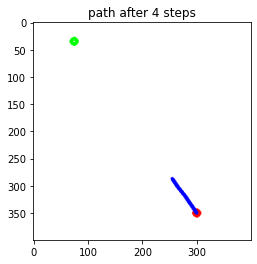

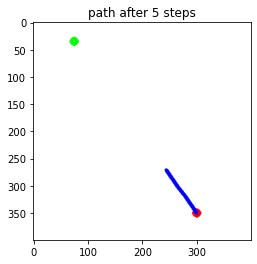

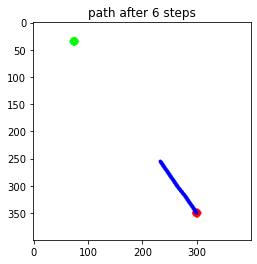

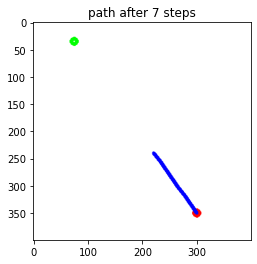

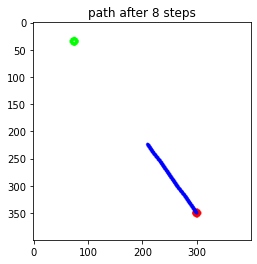

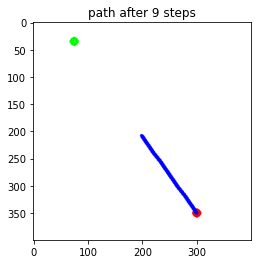

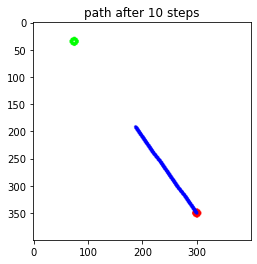

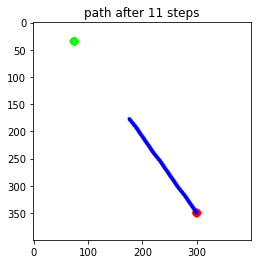

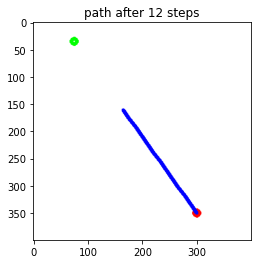

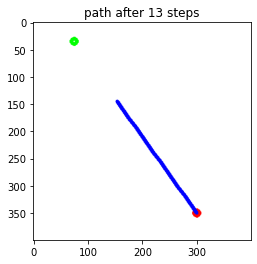

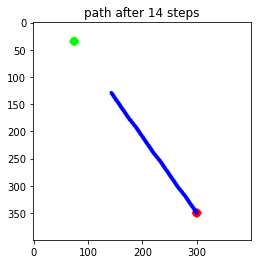

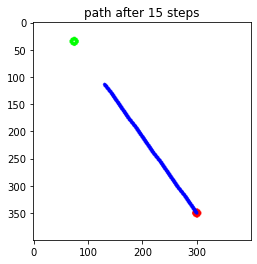

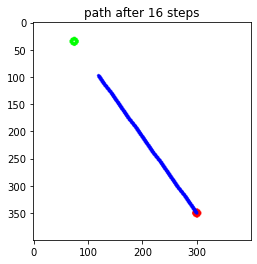

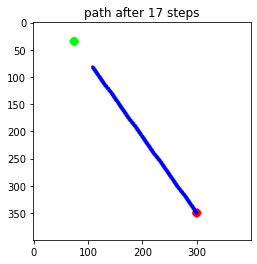

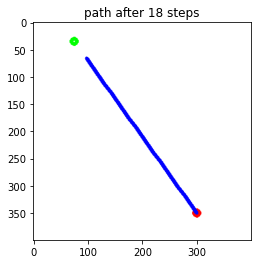

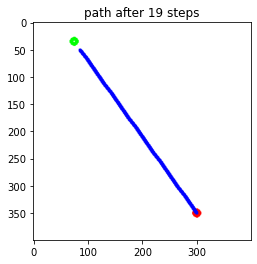

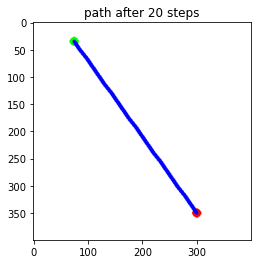

In [6]:
# Main variables
robot_initial_point = (300, 350)
robot_goal_point = (75, 35)
v_max = 20
v_min = -20
delta_t = 1
n = 20 # number of points
world_size = (400,400)
world = letThereBeWorld(world_size)
# Show initial world
plt.imshow(world)
plt.title("Initial world")
plt.show()    
# Solve the problem
x,y = getPath(robot_initial_point, robot_goal_point, v_min, v_max, delta_t, n) 
# Display (and save) the path after each step
markPath(x,y,world)